In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats 

In [5]:
df_benin = pd.read_csv("../src/data/benin_cleaned_data.csv")
df_sier = pd.read_csv("../src/data/sierraleone_cleaned_data.csv")
df_togo = pd.read_csv("../src/data/togo-dapaong_cleaned_data.csv")

Metric Comparison with Boxplots

C:\Users\mijuu\AppData\Local\Temp\ipykernel_32520\3690853486.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


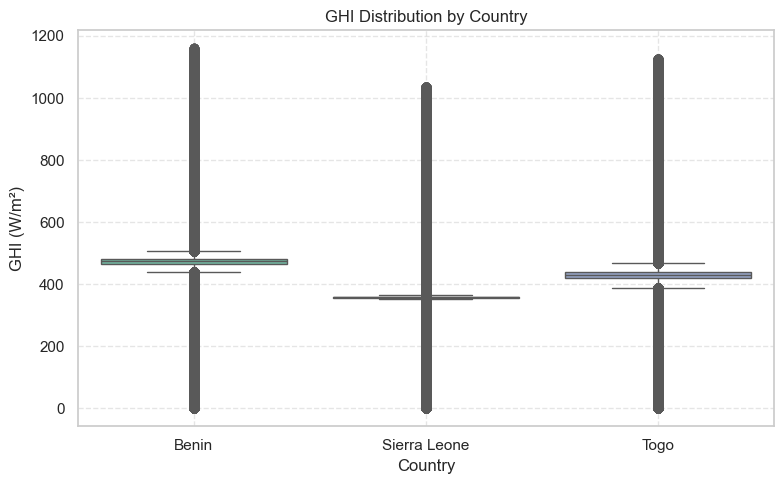

✅ Plot saved as: ../images/compare_countries/GHI_boxplot.png


C:\Users\mijuu\AppData\Local\Temp\ipykernel_32520\3690853486.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


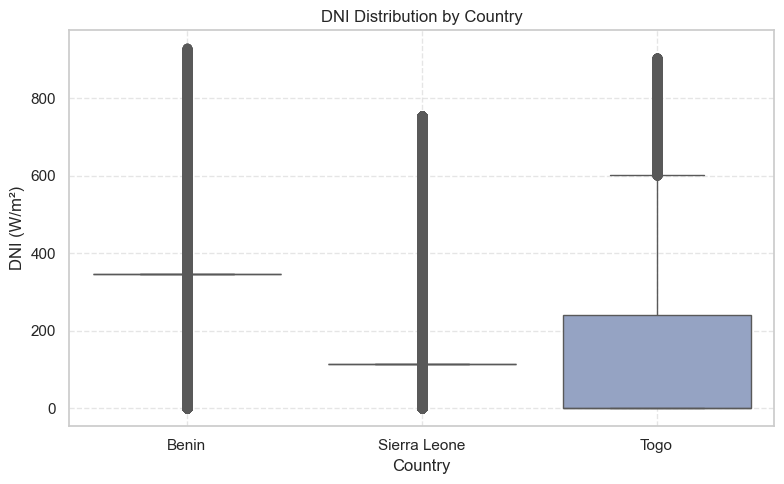

✅ Plot saved as: ../images/compare_countries/DNI_boxplot.png


C:\Users\mijuu\AppData\Local\Temp\ipykernel_32520\3690853486.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


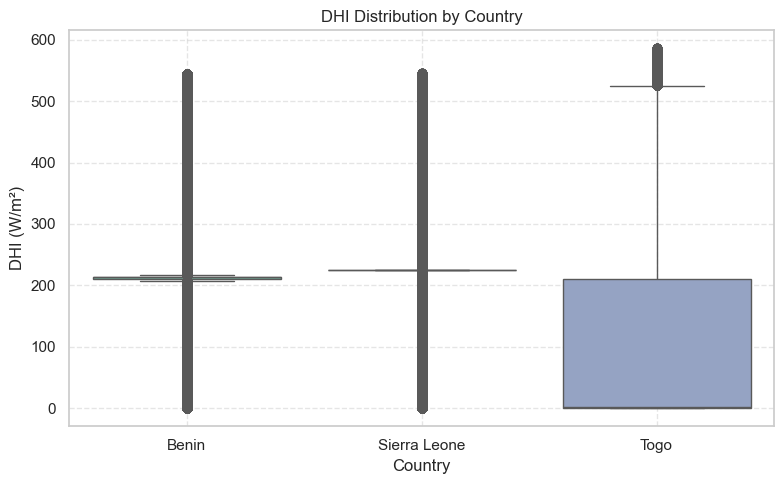

✅ Plot saved as: ../images/compare_countries/DHI_boxplot.png


In [6]:
# Add a Country column to distinguish them when combined
df_benin['Country'] = 'Benin'
df_sier['Country'] = 'Sierra Leone'
df_togo['Country'] = 'Togo'

#Merge all three into a single DataFrame
df_all = pd.concat([df_benin, df_sier, df_togo], ignore_index=True)

#Plot boxplots for each metric
metrics = ['GHI', 'DNI', 'DHI']

# Set plot style
sns.set(style="whitegrid")

# Save path base (update as needed)
base_path = "../images/compare_countries/"


# Create boxplots side-by-side
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.xlabel("Country")
    plt.ylabel(f"{metric} (W/m²)")
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.5)
   

    # Save plot
    output_path = f"{base_path}{metric}_boxplot.png"
    plt.savefig(output_path, dpi=300)
    plt.show()

    print(f"✅ Plot saved as: {output_path}")

Summary table

In [7]:
# Create summary table using groupby
summary_stats = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std'])

# Round for cleaner display
summary_stats = summary_stats.round(2)

# Display the result
print("📊 Summary Table of GHI, DNI, and DHI (Mean, Median, Std) by Country:")
print(summary_stats)

📊 Summary Table of GHI, DNI, and DHI (Mean, Median, Std) by Country:
                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         474.91  474.2  227.44  348.87  345.7  193.30  216.00  213.4   
Sierra Leone  376.16  359.5  205.87  162.74  115.3  173.98  224.38  225.0   
Togo          441.00  430.3  225.94  149.37    0.0  248.55  112.40    1.8   

                      
                 std  
Country               
Benin          96.14  
Sierra Leone   97.03  
Togo          151.30  


Statistical Testing

In [8]:
from scipy.stats import kruskal

# Extract GHI values for each country
ghi_benin = df_benin['GHI'].dropna()
ghi_sier = df_sier['GHI'].dropna()
ghi_togo = df_togo['GHI'].dropna()

# Run Kruskal–Wallis test
stat, p = kruskal(ghi_benin, ghi_sier, ghi_togo)

# Print results
print(f"📊 Kruskal–Wallis H-test statistic: {stat:.4f}")
print(f"📉 p-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("✅ Significant difference in GHI across countries (reject null hypothesis).")
else:
    print("ℹ️ No significant difference in GHI across countries (fail to reject null).")

#There is a statistically significant difference in Global Horizontal Irradiance (GHI) 
# between at least two of the countries.

📊 Kruskal–Wallis H-test statistic: 179762.5204
📉 p-value: 0.0000
✅ Significant difference in GHI across countries (reject null hypothesis).


- Benin has the highest average and median GHI and DNI, suggesting it receives the most consistent and intense solar radiation — making it a strong candidate for solar installations.

- Sierra Leone shows a higher average and median DHI than the other countries, which may indicate more diffuse (scattered) sunlight due to cloud cover 

- Togo has relatively high GHI, but very low median DNI, suggesting that direct sunlight is more inconsistent 

Visual Summary

C:\Users\mijuu\AppData\Local\Temp\ipykernel_32520\207014600.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ghi_df, x='Country', y='Average_GHI', palette='viridis')


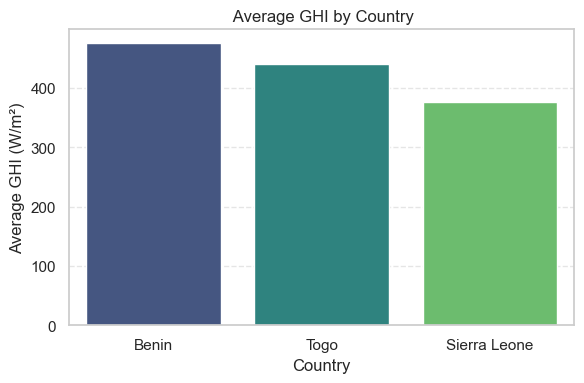

✅ Plot saved as: ../images/compare_countries/ghi_avg_by_country.png


In [9]:
# Summary GHI means from summary table
avg_ghi = {
    'Benin': 474.91,
    'Sierra Leone': 376.16 ,
    'Togo': 441.00
}

# Convert to a DataFrame for plotting
import pandas as pd
ghi_df = pd.DataFrame(list(avg_ghi.items()), columns=['Country', 'Average_GHI'])

# Sort for visual clarity
ghi_df = ghi_df.sort_values('Average_GHI', ascending=False)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=ghi_df, x='Country', y='Average_GHI', palette='viridis')

plt.title(' Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)


# ✅ Save the plot before showing
output_path = "../images/compare_countries/ghi_avg_by_country.png"
plt.savefig(output_path, dpi=300)  # Save at high resolution
plt.show()

print(f"✅ Plot saved as: {output_path}")